In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime


# 6.1.4 Create Latitude and Longitude Combinations

In [48]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
# output is a zip object in memory
# zip object packs each pair of lats and lngs having the same index in their respective array into a tuple
lat_lngs = zip(lats, lngs)
lat_lngs

In [49]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [50]:
from citipy import citipy

In [51]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

272

# 6.2.6

In [34]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f" Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
 Processing Record 1 of Set 1 | novoagansk
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 2 of Set 1 | cayenne
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 3 of Set 1 | alpinopolis
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 4 of Set 1 | mataura
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 5 of Set 1 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 7 of Set 1 | muros
-----------------------------
Data Retrieval Complete      
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 12 of Set 2 | hobart
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 13 of Set 2 | esperance
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 14 of Set 2 | mandalgovi
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 15 of Set 2 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 16 of Set 2 | new norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 17 of Set 2 | tuktoyaktuk
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 18 of Set 2 | touros
-----------------------------
Data Retrieval Complete      
-----------

# Run API request for each of the cities

In [43]:
city_data.head()

[{'City': 'Novoagansk',
  'Lat': 61.9449,
  'Lng': 76.6625,
  'Max Temp': 38.25,
  'Humidity': 91,
  'Cloudiness': 97,
  'Wind Speed': 8.68,
  'Country': 'RU',
  'Date': '2021-10-18 23:22:19'},
 {'City': 'Cayenne',
  'Lat': 4.9333,
  'Lng': -52.3333,
  'Max Temp': 81.09,
  'Humidity': 82,
  'Cloudiness': 75,
  'Wind Speed': 2.3,
  'Country': 'GF',
  'Date': '2021-10-18 23:22:19'},
 {'City': 'Alpinopolis',
  'Lat': -20.8636,
  'Lng': -46.3881,
  'Max Temp': 66.22,
  'Humidity': 94,
  'Cloudiness': 96,
  'Wind Speed': 3.22,
  'Country': 'BR',
  'Date': '2021-10-18 23:22:20'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 44.96,
  'Humidity': 80,
  'Cloudiness': 100,
  'Wind Speed': 6.91,
  'Country': 'NZ',
  'Date': '2021-10-18 23:22:20'},
 {'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 47.17,
  'Humidity': 77,
  'Cloudiness': 50,
  'Wind Speed': 1.99,
  'Country': 'US',
  'Date': '2021-10-18 23:19:12'},
 {'City': 'Muros',
  'Lat': 42.776

# Convert the array of dictionaries (city_data) to a DataFrame

In [54]:
city_data_df = pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Novoagansk,61.9449,76.6625,38.25,91,97,8.68,RU,2021-10-18 23:22:19
1,Cayenne,4.9333,-52.3333,81.09,82,75,2.30,GF,2021-10-18 23:22:19
2,Alpinopolis,-20.8636,-46.3881,66.22,94,96,3.22,BR,2021-10-18 23:22:20


## Reorder the column so easier to read

In [55]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [58]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novoagansk,RU,2021-10-18 23:22:19,61.9449,76.6625,38.25,91,97,8.68
1,Cayenne,GF,2021-10-18 23:22:19,4.9333,-52.3333,81.09,82,75,2.30
2,Alpinopolis,BR,2021-10-18 23:22:20,-20.8636,-46.3881,66.22,94,96,3.22
3,Mataura,NZ,2021-10-18 23:22:20,-46.1927,168.8643,44.96,80,100,6.91
4,Albany,US,2021-10-18 23:19:12,42.6001,-73.9662,47.17,77,50,1.99


# Save the data to CSV

In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# the index label (or column A) header as "City_ID."
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Scatterplot

In [69]:
# Import time module
import time

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
lngs = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Latitude vs. max temperature

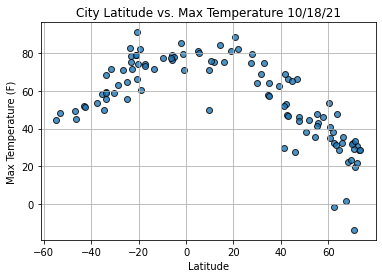

In [76]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Latitude vs. humdity

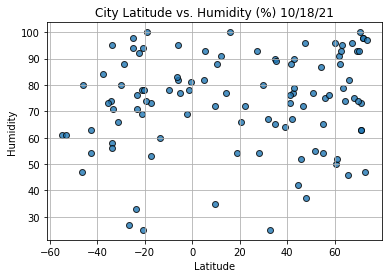

In [77]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Latitude vs. cloudiness

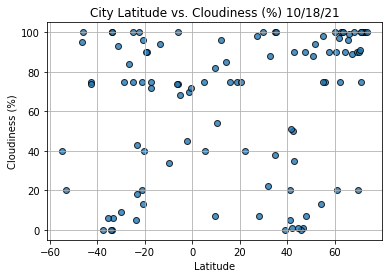

In [78]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Latitude vs. windspeed

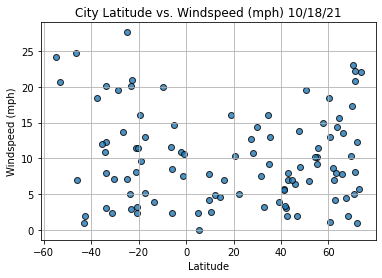

In [75]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed (mph) "+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()